In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def difference_table(x,y):
    size = len(x)
    table = np.zeros([size, size])
    table[:,0] = y
    for j in range(1, size):
        for i in range(size - j):
            table[i][j] = (table[i+1][j-1] - table[i][j-1]) / (x[i+j]-x[i])
    return table[0, :]


def newton_polynomial(x,y, data):
    coeffs = difference_table(x,y)
    size = len(data)
    values = []
    for xn in data:
        polynomial = coeffs[0]
        dx = 1
        for i in range(len(x)-1):
            dx *= xn - x[i]
            polynomial += dx*coeffs[i+1]
        values.append(polynomial)
    return values


In [123]:
def calculate_errors(N):
    x0 = np.linspace(-1,1,10**3)
    i = 5
    n = []
    errors = []
    while(i<N):
        n.append(i)
        i +=1
    for i in n:
        diff = []
        y = []
        x = np.linspace(-1,1,i)
        for j in x:
            y.append(math.exp(j))
        poly = newton_polynomial(x,y, x0)
        for j in range(len(poly)):
            diff.append(abs(poly[j] - math.exp(x0[j])))
        errors.append(max(diff))
    return errors, n

In [59]:
y,x = calculate_errors(100)
print(y)

[0.0011244170182345137, 0.00011216124123780702, 9.980036194789932e-06, 7.988929375812859e-07, 5.800901137220649e-08, 3.849886631712707e-09, 2.3508128776938975e-10, 1.3285816891084323e-11, 6.994405055138486e-13, 3.375077994860476e-14, 2.7200464103316335e-15, 8.43769498715119e-15, 1.5432100042289676e-14, 8.659739592076221e-15, 4.618527782440651e-14, 2.0827783941967937e-13, 3.913536161803677e-14, 3.9768188742073107e-13, 1.1377565556358604e-12, 5.542233338928781e-13, 4.96269692007445e-12, 1.9468870959826745e-12, 6.95044022336333e-12, 1.8423929049049548e-11, 2.3277824112710732e-11, 4.1447734133726044e-11, 1.24503518605934e-10, 7.661943302039731e-11, 3.6819031157264703e-10, 4.2950265566332746e-10, 2.3404345128597015e-10, 3.905984868879386e-09, 1.5067788128320103e-09, 1.5675477804677485e-08, 1.0002648931362046e-08, 1.9910237014642007e-08, 2.34793117170895e-08, 1.5184315671490367e-07, 2.650081851740538e-07, 3.932920484839286e-07, 2.7045979233975004e-07, 7.384493421191962e-07, 9.693585635073276

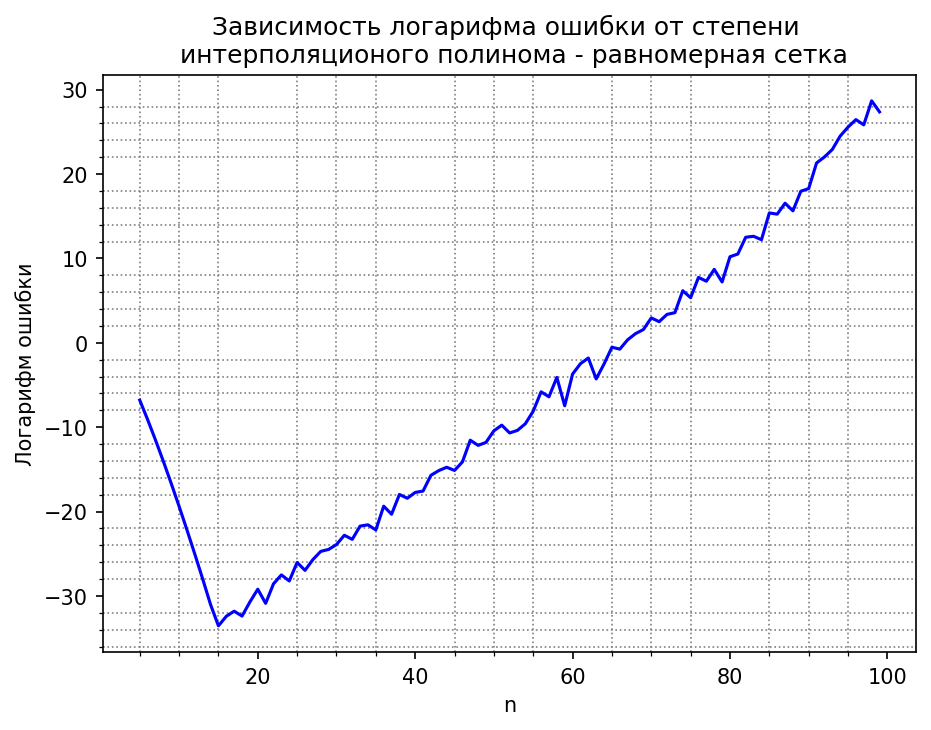

In [53]:
ln = []
for i in y:
    ln.append(math.log(i))
fig, ax = plt.subplots(figsize=(7, 5), dpi=150)
ax.plot(x,ln, color = "blue")
plt.minorticks_on()
plt.grid(which='major',
        color = 'grey', 
        linewidth = 0.7)
plt.grid(which='minor', 
        color = 'grey', 
        linestyle = ':')
plt.xlabel("n")
plt.ylabel("Логарифм ошибки")
plt.title("Зависимость логарифма ошибки от степени \n интерполяционого полинома - равномерная сетка")
plt.grid()
fig.savefig('1.png')

In [75]:
def calculate_errors_chebyshev():
    x0 = np.linspace(-1,1,10**3)
    i = 5
    n = []
    errors = []
    while(i<100):
        n.append(i)
        i +=1
    for i in n:
        x_ch = []
        diff = []
        y = []
        x = np.linspace(-1,1,i)
        for j in range(i):
            x_ch.append(math.cos(math.pi*(2*j+1)/(2*i)))
        for j in x_ch:
            y.append(math.exp(j))
        poly = newton_polynomial(x_ch,y, x0)
        for j in range(len(poly)):
            diff.append(abs(poly[j] - math.exp(x0[j])))
        errors.append(max(diff))
    return errors, n

In [78]:
y1,x1 = calculate_errors_chebyshev()
print(y1)

[0.0006396994825514923, 5.179584768288947e-05, 3.6200882660430977e-06, 2.224393229610655e-07, 1.2190071618789489e-08, 6.02708993824308e-10, 2.7140067970776727e-11, 1.1217693440812582e-12, 4.3076653355456074e-14, 2.6645352591003757e-15, 1.3322676295501878e-15, 1.3322676295501878e-15, 1.3322676295501878e-15, 1.3322676295501878e-15, 1.3877787807814457e-15, 1.1102230246251565e-15, 1.3322676295501878e-15, 1.3322676295501878e-15, 1.3322676295501878e-15, 1.3322676295501878e-15, 1.3322676295501878e-15, 1.3322676295501878e-15, 1.3322676295501878e-15, 1.3322676295501878e-15, 1.609823385706477e-15, 1.3322676295501878e-15, 1.2212453270876722e-15, 1.7763568394002505e-15, 1.7763568394002505e-15, 1.3322676295501878e-15, 1.3322676295501878e-15, 1.1102230246251565e-15, 1.7763568394002505e-15, 2.1649348980190553e-15, 2.4980018054066022e-15, 2.0539125955565396e-15, 1.042499420123022e-13, 8.08242361927114e-14, 1.3301026946521688e-12, 5.291322935363496e-13, 6.80128176000494e-12, 4.1576575515733794e-11, 1.0

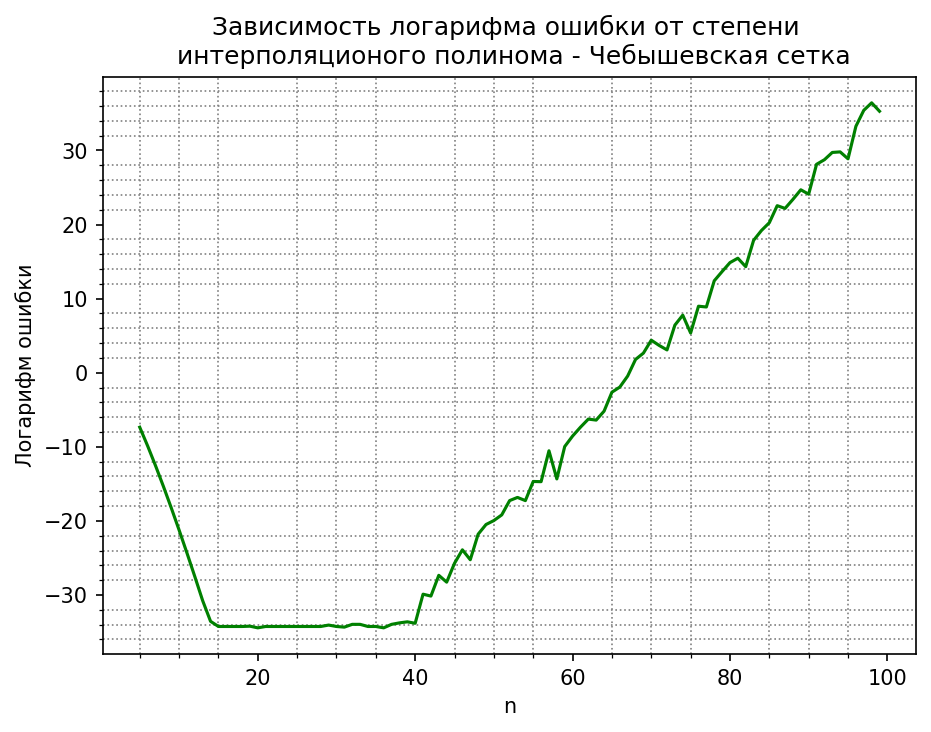

In [77]:
ln1 = []
for i in y1:
    ln1.append(math.log(i))
fig, ax = plt.subplots(figsize=(7, 5), dpi=150)
ax.plot(x1,ln1, color = "green")
plt.minorticks_on()
plt.grid(which='major',
        color = 'grey', 
        linewidth = 0.7)
plt.grid(which='minor', 
         color = 'grey', 
        linestyle = ':')
plt.xlabel("n")
plt.ylabel("Логарифм ошибки")
plt.title("Зависимость логарифма ошибки от степени \n интерполяционого полинома - Чебышевская сетка")
plt.grid()
fig.savefig('2.png')    

In [92]:
def polynome_errors(n):
    x0 = np.linspace(-1,1,10**4)
    errors = []
    y = []
    #Равномерная сетка
    x = np.linspace(-1,1,n)
    for i in x:
        y.append(math.exp(i))
    poly = newton_polynomial(x,y, x0)
    for i in range(len(x0)):
        err = abs(poly[i] - math.exp(x0[i]))
        errors.append(err)
    #Чебышевская сетка
    x_ch = []
    y_ch = []
    errors_ch = []
    for j in range(len(x)):
        x_ch.append(math.cos(math.pi*(2*j+1)/(2*n)))
    for j in x_ch:
        y_ch.append(math.exp(j))

    poly_ch = newton_polynomial(x_ch,y_ch, x0)
    for i in range(len(poly_ch)):
        err = abs(poly_ch[i] - math.exp(x0[i]))
        errors_ch.append(err)
        
    fig, ax = plt.subplots(2,figsize=(7, 5), dpi=150)
    fig.suptitle("Число узлов = "+str(n))
    ax[0].plot(x0,errors, color = "blue",label = 'Равномерная сетка')
    ax[1].plot(x0,errors_ch, color = "red",label = "Чебышевская сетка")
    ax[0].set_ylabel("Ошибка")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("Ошибка")
    ax[0].grid()
    ax[1].grid()
    ax[0].legend()
    ax[1].legend()
    print("Одномерная: ","{:.4e}".format(max(errors)))
    print("Чебышевская: ","{:.4e}".format(max(errors_ch)))
    

Одномерная:  4.3845e+13
Чебышевская:  7.8673e+15


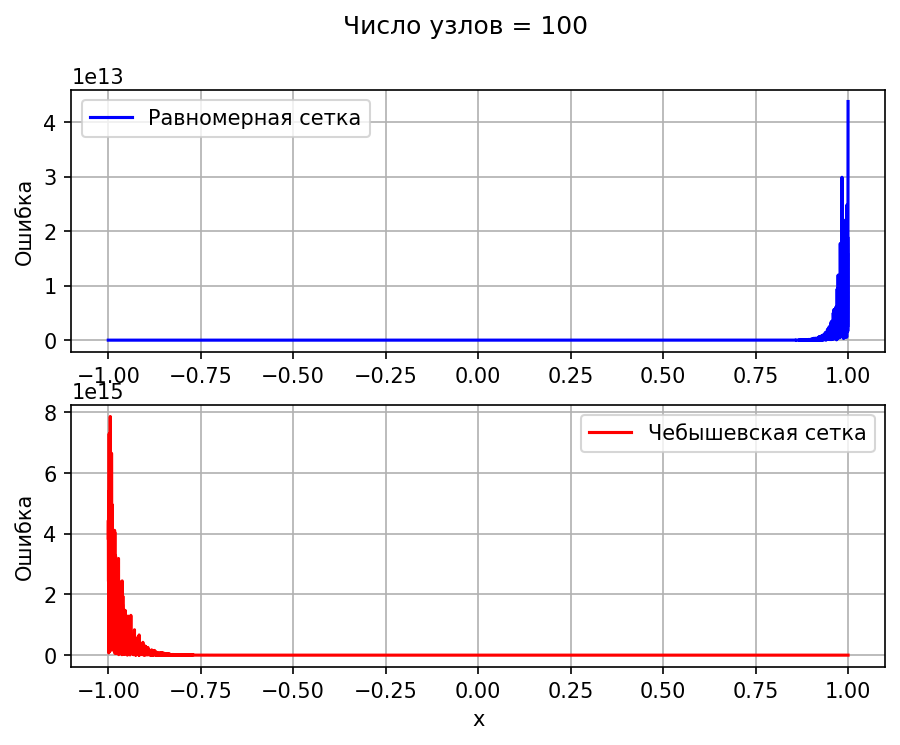

In [93]:
polynome_errors(100)

In [115]:
def Lebeg(n):
    N = np.arange(3,n+1)
    L = []
    for i in range(3,n+1):
        L.append(2**i/(math.e*(i-1)*math.log(i-1)))
    return L,N

[2.122951381692172, 1.785910922793636, 2.122951381692172]
[3 4 5]


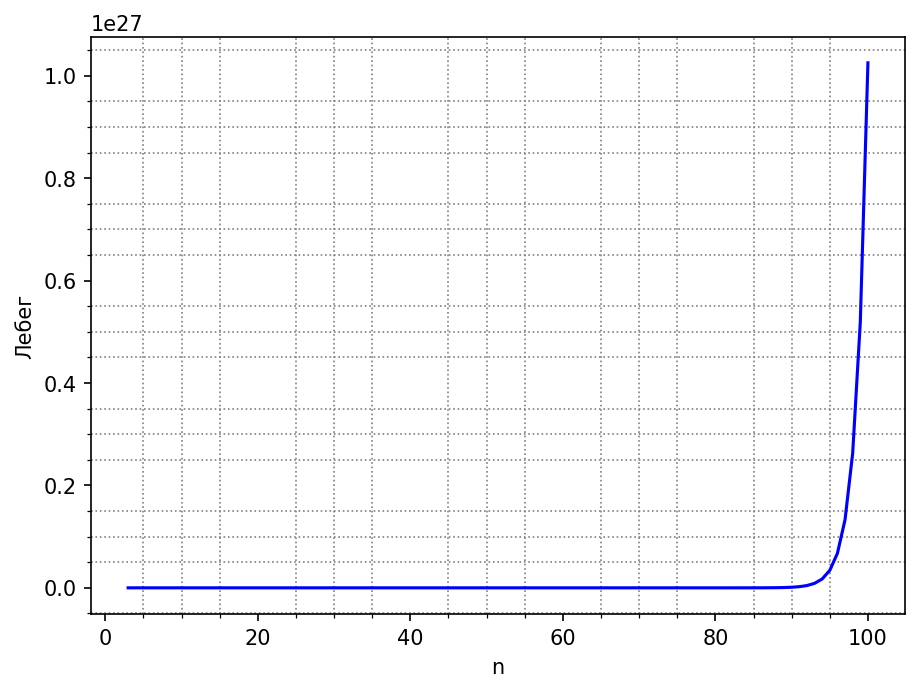

In [135]:
L,N = Lebeg(100)
fig, ax = plt.subplots(figsize=(7, 5), dpi=150)
ax.plot(N,L, color = "blue")
plt.minorticks_on()
plt.grid(which='major',
        color = 'grey', 
        linewidth = 0.7)
plt.grid(which='minor', 
        color = 'grey', 
        linestyle = ':')
plt.xlabel("n")
plt.ylabel("Лебег")
plt.grid()

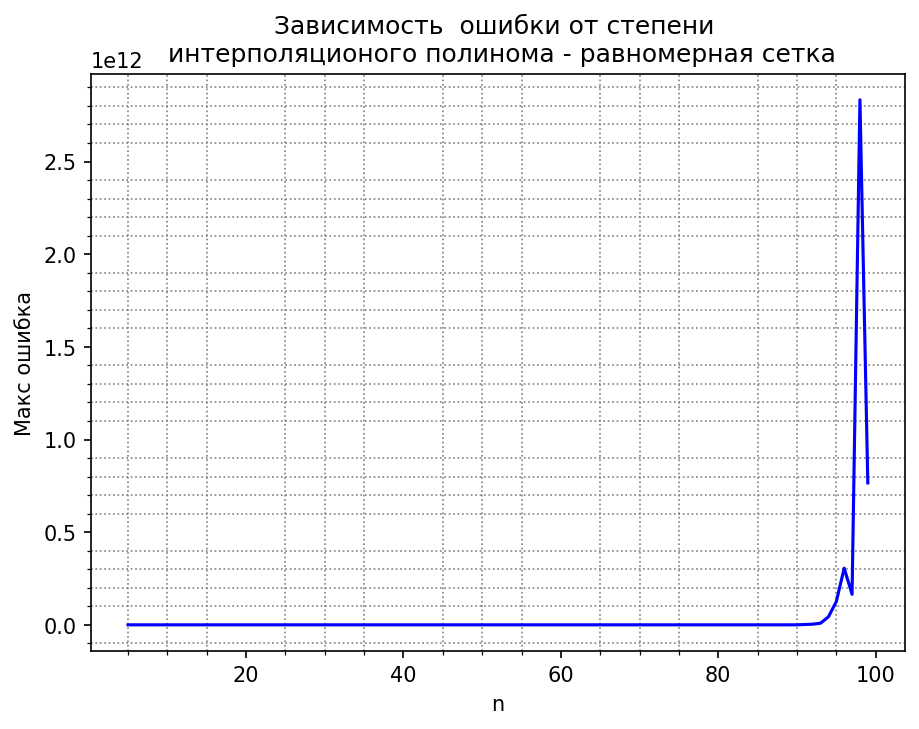

In [138]:
y,x = calculate_errors(100)
fig, ax = plt.subplots(figsize=(7, 5), dpi=150)
ax.plot(x,y, color = "blue")
plt.minorticks_on()
plt.grid(which='major',
        color = 'grey', 
        linewidth = 0.7)
plt.grid(which='minor', 
        color = 'grey', 
        linestyle = ':')
plt.xlabel("n")
plt.ylabel("Макс ошибкa")
plt.title("Зависимость  ошибки от степени \n интерполяционого полинома - равномерная сетка")
plt.grid()
fig.savefig('1.png')